In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [21]:
import os
import matplotlib.pyplot as plt
import cv2

In [22]:
len(os.listdir('/kaggle/input/global-wheat-detection/train'))

3422

944c60a15.jpg


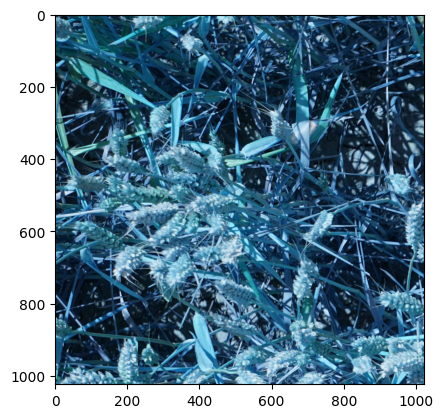

In [23]:
for file in os.listdir('/kaggle/input/global-wheat-detection/train'):
    image = os.path.join('/kaggle/input/global-wheat-detection/train',file)
    print(file)
    img = cv2.imread(image)
    plt.imshow(img)
    break
    

In [24]:
df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')

In [25]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [ ]:
plt.imshow(cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg'))

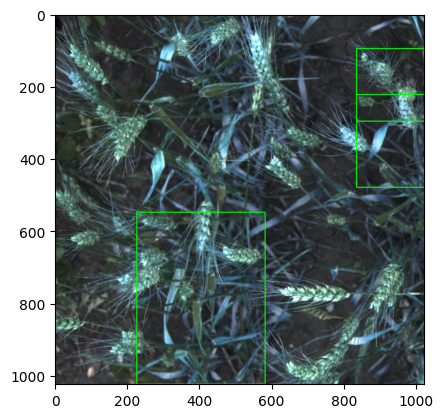

In [29]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg')
x_min = 834.0
y_min = 222.0
x_max = (834.0+56.0)
y_max = (222.0+36.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 226.0
y_min = 548.0
x_max = (226.0+130.0)
y_max = (548.0+58.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 834.0
y_min = 95.0
x_max = (834.0+109.0)
y_max = (95.0+107.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)

plt.imshow(image)


In [32]:
records = df[df['image_id']=='b6ab77fd7']

In [34]:
records.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [48]:
list = records['bbox'].values
list


array(['[834.0, 222.0, 56.0, 36.0]', '[226.0, 548.0, 130.0, 58.0]',
       '[377.0, 504.0, 74.0, 160.0]', '[834.0, 95.0, 109.0, 107.0]',
       '[26.0, 144.0, 124.0, 117.0]', '[569.0, 382.0, 119.0, 111.0]',
       '[52.0, 602.0, 82.0, 45.0]', '[627.0, 302.0, 122.0, 75.0]',
       '[412.0, 367.0, 68.0, 82.0]', '[953.0, 220.0, 56.0, 103.0]',
       '[30.0, 70.0, 126.0, 133.0]', '[35.0, 541.0, 46.0, 46.0]',
       '[103.0, 60.0, 117.0, 83.0]', '[417.0, 4.0, 110.0, 91.0]',
       '[764.0, 299.0, 119.0, 93.0]', '[539.0, 58.0, 58.0, 130.0]',
       '[139.0, 274.0, 121.0, 76.0]', '[461.0, 634.0, 118.0, 64.0]',
       '[215.0, 634.0, 113.0, 75.0]', '[134.0, 903.0, 127.0, 49.0]',
       '[737.0, 545.0, 87.0, 48.0]', '[292.0, 930.0, 43.0, 46.0]',
       '[0.0, 827.0, 86.0, 58.0]', '[324.0, 44.0, 57.0, 70.0]',
       '[663.0, 794.0, 116.0, 64.0]', '[325.0, 730.0, 76.0, 72.0]',
       '[155.0, 554.0, 74.0, 70.0]', '[783.0, 833.0, 70.0, 91.0]',
       '[534.0, 46.0, 73.0, 224.0]', '[155.0, 281.0, 1

In [ ]:
#function to visualize image 

def visualize(image_path,dataframe,image_id):
    image = cv2.imread(image_path)

    records = 